# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Question 1
_Provide a basic summary of the data set._

**Answer:**
The basic summary of the data set is obtained by running the code cell above.

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Read in the sign_names from csv file
sign_names = {}
import csv
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if row[0] != 'ClassId':
            sign_names[int(row[0])]=row[1]
            

Speed limit (20km/h)


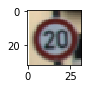

Speed limit (30km/h)


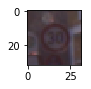

Speed limit (50km/h)


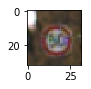

Speed limit (60km/h)


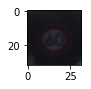

Speed limit (70km/h)


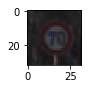

Speed limit (80km/h)


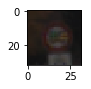

End of speed limit (80km/h)


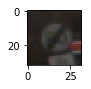

Speed limit (100km/h)


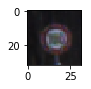

Speed limit (120km/h)


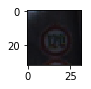

No passing


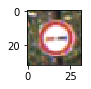

No passing for vehicles over 3.5 metric tons


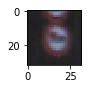

Right-of-way at the next intersection


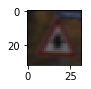

Priority road


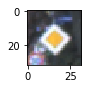

Yield


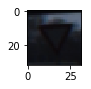

Stop


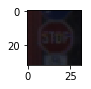

No vehicles


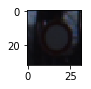

Vehicles over 3.5 metric tons prohibited


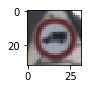

No entry


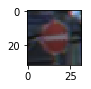

General caution


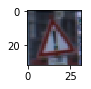

Dangerous curve to the left


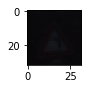

Dangerous curve to the right


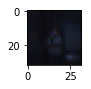

Double curve


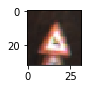

Bumpy road


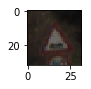

Slippery road


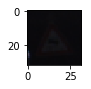

Road narrows on the right


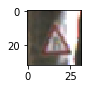

Road work


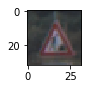

Traffic signals


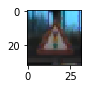

Pedestrians


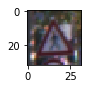

Children crossing


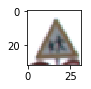

Bicycles crossing


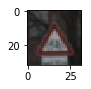

Beware of ice/snow


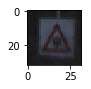

Wild animals crossing


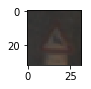

End of all speed and passing limits


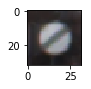

Turn right ahead


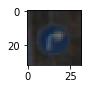

Turn left ahead


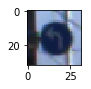

Ahead only


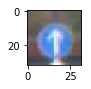

Go straight or right


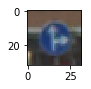

Go straight or left


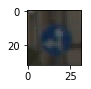

Keep right


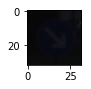

Keep left


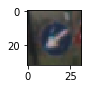

Roundabout mandatory


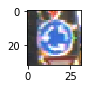

End of no passing


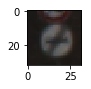

End of no passing by vehicles over 3.5 metric tons


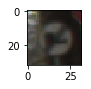

In [4]:
# Plot a representative of each traffic sign identified by its name

for i in range(n_classes):
    for j in range(len(y_train)):
        if (y_train[j] == i):
            print(sign_names[i])
            image = X_train[j].squeeze()
            plt.figure(figsize=(1,1))
            plt.imshow(image, cmap="gray")
            plt.show()
            break

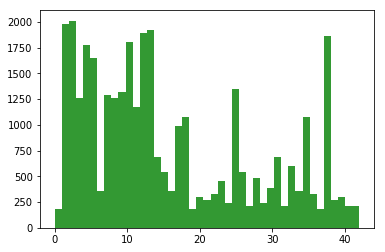

In [5]:
# Plot the histogram of labels

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y_train,n_classes,color='green',alpha=0.8)
plt.show()

### Question 2
_Include an exploratory visualization of the dataset._

**Answer:** We first visualize a representative of each traffic sign, identified by its name. Next, the histogram of class-labels is plotted above, which is evidently quite unbalanced. To remedy this unbalance partially, the images of the worse-represented classes are duplicated, after random rotations by small angles. This is done next at the preprocessing stage. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
# Data augmentation

import scipy.ndimage

class_count = np.bincount(y_train)

X_train_aug = []
y_train_aug = []


for i in range(len(y_train)):
    
    # Duplicate (after slight perturbation) images of classes whose count below a threhold 
    if class_count[y_train[i]] < 500:
        
        # random rotations betweein -10 and 10 degrees
        dorotate = np.random.randint(-10,10)
        
        image = scipy.ndimage.rotate(X_train[i], dorotate, mode = 'reflect', reshape=False)
        
        X_train_aug.append(image)
        y_train_aug.append(y_train[i])

X_train = np.append(X_train, X_train_aug , axis = 0)
y_train = np.append(y_train, y_train_aug, axis = 0)

print(len(X_train))

40859


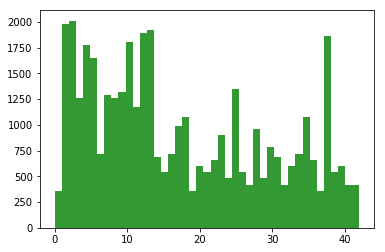

In [7]:
# Plot the histogram for augmented data

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y_train,n_classes,color='green',alpha=0.8)
plt.show()

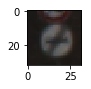

In [8]:
# first image of the dataset before rotation and normalization

image = X_train[0].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")


In [9]:
# Normalization

X_train = 0.1 + (0.8/255)* X_train
X_test = 0.1 + (0.8/255)*X_test

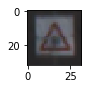

In [10]:
# first image of the dataset after rotation and normalization

image = X_train[39209].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")


In [11]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 3 

_Describe how you preprocessed the image data. What tecniques were chosen and why did you choose these techniques?_


**Answer:** As was motivated in the answer to the previous question, the data was first augmented by the perturbed images of the under-represented classes. Apart from reducing the unbalance in the representation of different classes as can be seen in the histogram for the augmented data, random perturbations could possibly have the additional benefit of increasing the robustness of the classifier.

The second step was to normalize the images so that all the numerical values are in the range of 0.1 to 0.9. Apart from reducing variance in the dataset, this makes the problem well-conditioned for the optimizer.

The impact of rotation and normalization is shown on the very first image of the dataset.

Finally, the training data is randomly shuffled to avoid batch effects while training.

### Split Data into Training, Validation and Testing Sets

In [12]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print('training size: {}, validation size: {}'.format(X_train.shape[0],X_validation.shape[0]))

training size: 32687, validation size: 8172


### Question 4

_Describe how you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: If you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)_


**Answer:** The sklearn method, `train_test_split()`, is used to split the training data further into training and validation data, with the size of the latter set to 20% of the augmented training data. 20% seems reasonable, considering the significant data augmentation that we performed.

The motivation, the technique and the impact of data augmentation has already been discussed in the previous sections.

### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([6], mean = mu, stddev = sigma)),
        'bc2': tf.Variable(tf.truncated_normal([16], mean = mu, stddev = sigma)),
        'bd1': tf.Variable(tf.truncated_normal([120], mean = mu, stddev = sigma)),
        'bd2': tf.Variable(tf.truncated_normal([84], mean = mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal([n_classes], mean = mu, stddev = sigma))}
    
    def conv2d(x, W, b, strides=1):
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
        x = tf.nn.bias_add(x, b)
        return tf.nn.relu(x)
    
    
    def maxpool2d(x, k=2):
        return tf.nn.max_pool(
            x,
            ksize=[1, k, k, 1],
            strides=[1, k, k, 1],
            padding='VALID')
    
    
    # Layer 1: Convolutional, with Dropout and Maxpooling    
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = tf.nn.dropout(conv1, keep_prob)
    conv1 = maxpool2d(conv1, k=2)
    
    
    # Layer 2: Convolutional, with Dropout and Maxpooling
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    #conv2 = tf.nn.dropout(conv2, keep_prob)
    conv2 = maxpool2d(conv2, k=2) 
    
    # Flatten
    fc1 = flatten(conv2)
    
    # Layer 3: Fully Connected with Dropout 
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    

    
    # Layer 4: Fully Connected 
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    
    # Layer 5: Fully Connected
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits

### Question 5
_Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.)_

**Answer:** My final model is essentially LeNet architecture with Dropout. It consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5x3x6   | 1x1 stride, valid padding 	                |
| RELU                  |												|
| Dropout               |                                               |
| Max pooling	      	| 2x2 stride, valid padding                     |
| Convolution 5x5x6x16  | 1x1 stride, valid padding 	                |
| RELU                  |												|
| Max pooling	      	| 2x2 stride, valid padding                     |
| Flatten				|												|
| Fully connected 400x120|        									    |
| RELU                  |												|
| Dropout               |                                               |
| Fully connected 120x84|        									    |
| RELU                  |												|
| Fully connected 84x43 |        									    |

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

EPOCHS = 50
BATCH_SIZE = 128
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.553

EPOCH 2 ...
Validation Accuracy = 0.794

EPOCH 3 ...
Validation Accuracy = 0.883

EPOCH 4 ...
Validation Accuracy = 0.893

EPOCH 5 ...
Validation Accuracy = 0.935

EPOCH 6 ...
Validation Accuracy = 0.946

EPOCH 7 ...
Validation Accuracy = 0.953

EPOCH 8 ...
Validation Accuracy = 0.954

EPOCH 9 ...
Validation Accuracy = 0.970

EPOCH 10 ...
Validation Accuracy = 0.970

EPOCH 11 ...
Validation Accuracy = 0.975

EPOCH 12 ...
Validation Accuracy = 0.976

EPOCH 13 ...
Validation Accuracy = 0.979

EPOCH 14 ...
Validation Accuracy = 0.980

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.981

EPOCH 17 ...
Validation Accuracy = 0.982

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.987

EPOCH 20 ...
Validation Accuracy = 0.987

EPOCH 21 ...
Validation Accuracy = 0.987

EPOCH 22 ...
Validation Accuracy = 0.987

EPOCH 23 ...
Validation Accuracy = 0.990

EPOCH 24 ...
Validation Accura

### Question 6
_Describe how you trained your model._ 

**Answer:** The parameters were tuned keeping both validation accuracy and speed in consideration, with the former given the priority.
- Batch size is set to 128, and the learning rate is set to 0.001. Increasing the batch size and decreasing the learning rate considerably slowed down the training without significantly impacting the accuracy.
- Number of epochs is set to 50. Validation accuracy starts to stabilise by about 35th epoch , and doesn't show much improvement subsequently.
- Keep probability for dropout is set to 0.50, after some tinkering.

In [17]:
# Testing on provided test data

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    final_training_accuracy = evaluate(X_train, y_train, 1.0)
    final_validation_accuracy = evaluate(X_validation, y_validation, 1.0)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Final Training Accuracy = {:.3f}".format(final_training_accuracy))
    print("Final Validation Accuracy = {:.3f}".format(final_validation_accuracy))

Test Accuracy = 0.930
Final Training Accuracy = 0.998
Final Validation Accuracy = 0.992


### Question 7
_Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem._

**Answer:** LeNet architecture is taken as the starting point for solving this problem. This architecture was used as an example in the course for classifying hand-written digits, and it performs exceptionally well for this task. The images of hand-written digits can be thought of a combination of very simple geometry shapes, which is also the case with traffic signs. Therefore, the architecture is expected to do reasonably well with classifying traffic signs, the main challenge being the marginally more sophisticated shape of images, and the increased number of classes.  

There are a few ways in which the proposed traffic_sign_classifier differs from the digit_classifier presented in the course. 
- Firstly, the images are not converted to grayscale during preprocessing. This is because the traffic signs are color coded and therefore, the color information can come in handy for classification. 
- Secondly, we augment the data here to rectify the huge differences in the number of images belonging to different classes. To see how much of a difference the data augmentation makes, I ran the practically unmodified LeNet architecture before and after data augmentation. Here are the accuracy figures that I got:

Before data augmentation

| Final Training Accuracy | Final Validation Accuracy | Test Accuracy   |
|:-----------------------:|:-------------------------:|:---------------:| 
|      0.998  		      |         0.985 	          |     0.913       |

After data augmentation

| Final Training Accuracy | Final Validation Accuracy | Test Accuracy   |
|:-----------------------:|:-------------------------:|:---------------:| 
|      0.995  		      |         0.989	          |     0.917       |

With data augmentation, final training accuracy is marginally lower, while the test accuracy is marginally higher. The lower final training accuracy for data augmentation could be because of increased datasize necessitating more training epochs, while the higher test accuracy could indicate better learning. But the main difference between the two cases was that the batch effect was clearly visible while training without data augmentation: validation accuracy kept jumping up and down during the initial epochs.

- Finally, I decided to experiment with the dropout technique in the framework of LeNet architecture. I started by adding one dropout layer after the first convolutional layer. I obtained the following accuracy figures:

| Final Training Accuracy | Final Validation Accuracy | Test Accuracy   |
|:-----------------------:|:-------------------------:|:---------------:| 
|      0.992  		      |         0.983 	          |     0.920       |

Test accuracy improved only marginally. Next, I put the dropout layer after the first fully connected layer instead. The accuracy figures I got improved significantly:

| Final Training Accuracy | Final Validation Accuracy | Test Accuracy   |
|:-----------------------:|:-------------------------:|:---------------:| 
|      0.998  		      |         0.989 	          |     0.929       |

After some more experimentation, I settled on one dropout layer after the first convolutional layer, and one after the first fully connected layer, which gave me the following accuracy figures:

| Final Training Accuracy | Final Validation Accuracy | Test Accuracy   |
|:-----------------------:|:-------------------------:|:---------------:| 
|      0.998  		      |         0.993 	          |     0.945       |

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

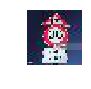

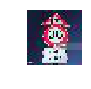

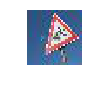

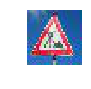

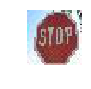

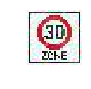

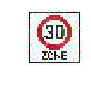

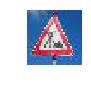

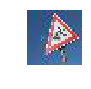

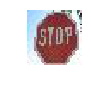

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
from PIL import Image

downloaded = []
for fname in glob.glob('downloaded-traffic-signs/*'):
    img = Image.open(fname)
    new_img = img.resize((32,32))
    new_img.save(fname[:-4]+ '_resized.jpg', "JPEG", optimize=True)

test_images = np.array([plt.imread(i) for i in glob.glob('downloaded-traffic-signs/*resized.jpg')])
for i in test_images:
    plt.figure(figsize = (1,1))
    plt.imshow(i)
    plt.axis('off')
    

### Question 8
_Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify._

**Answer:** Five German traffic signs downloaded from the web are shown above. 

The first two are very similar to the images in our training data, and I don't expect my classifier to have any difficulty with them.

The third image has some additional text under the sign which might trip the classifier, but I expect the classifier to work here.

The fourth image is rotated by a fairly large angle in the plane of the image. I think that the data augmentation technique of rotation by small random angles should have made my classifier fairly robust to correctly classify such an image.

The fifth image is also rotated, but *out* of the plane of the paper. Moreover, there are two traffic signs in the single image. This is very challenging, and it would be interesting to see if the classifier can get one of them right, while giving the second sign a reasonable probability.

Besides the above mentioned cases, the other cases where the classifier cannot be expected to work is when there is no traffic sign in the middle of the image, but there are two versions of the same sign on the periphery of the road and the image. This case would perhaps require some kind of transformation to be applied to the image to zoom in on one version of the sign.


### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

normalized =  0.1 + (0.8/255)* test_images

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction = sess.run(tf.nn.softmax(logits),feed_dict={x:normalized, keep_prob:1.0})
    print(list(map(lambda x:sign_names[x], np.argmax(prediction,axis=-1))))

['Yield', 'Yield', 'Dangerous curve to the right', 'Road work', 'Stop', 'Yield', 'Yield', 'Road work', 'Dangerous curve to the right', 'Stop']


### Analyze Performance

### Question 9
_Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set._

**Answer:** The accuracy of the predictions is only 40%, that is, only two out of five images have been classified correctly. This is rather disappointing. From the predictions above, it is clear that the "geometric" vision of the model is rather limited. That is, it very well identifies the shape of the sign-board - circle, triangle, etc. - but it can struggle with the shape at the center of the board. For example, it particularly struggles to distinguish different digits on the speed limit boards. 

The accuracy is very poor (40%), compared to the test accuracy of around 94%. I suspect that one possible reason for this poor performance might be due to the method I'm using for downsizing images to 32x32 shape. But I guess that as long as they are recognizable by humans, they are fair game.

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Road	work     		| Road work          							|
| Stop Sign      		| Stop sign   									| 
| 30 km/h     			| 50 km/h 										|
| Children crossing		| Traffic Signals								|
| 30 km/h	      		| 20 km/h					 				|


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    soft_max_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:normalized, keep_prob:1.0})
    print(soft_max_prob[0])
    print([list(map(lambda x:sign_names[x],i)) for i in soft_max_prob[1]])

[[  8.37448597e-01   1.61159098e-01   1.06652617e-03   2.35422369e-04
    6.51057126e-05]
 [  7.80775130e-01   2.18310103e-01   7.00099219e-04   1.50380249e-04
    4.26586776e-05]
 [  7.62602746e-01   1.17119797e-01   1.08530365e-01   1.00168074e-02
    7.51733605e-04]
 [  9.56246018e-01   2.47983076e-02   1.88915376e-02   6.18063859e-05
    2.13289877e-06]
 [  9.99995589e-01   1.86553120e-06   1.39638041e-06   5.70663360e-07
    5.66372023e-07]
 [  9.99826610e-01   1.66669299e-04   4.51840333e-06   6.58892191e-07
    5.69408542e-07]
 [  9.98396695e-01   1.55214372e-03   3.04225850e-05   1.37112120e-05
    3.09532720e-06]
 [  9.69834089e-01   1.55932158e-02   1.45304771e-02   4.06776817e-05
    1.46769946e-06]
 [  7.50014663e-01   1.24259003e-01   1.11639991e-01   1.22651318e-02
    5.85285423e-04]
 [  9.99995708e-01   1.71145564e-06   1.25742406e-06   6.17213743e-07
    6.03705416e-07]]
[['Yield', 'No passing', 'No entry', 'No vehicles', 'No passing for vehicles over 3.5 metric tons']

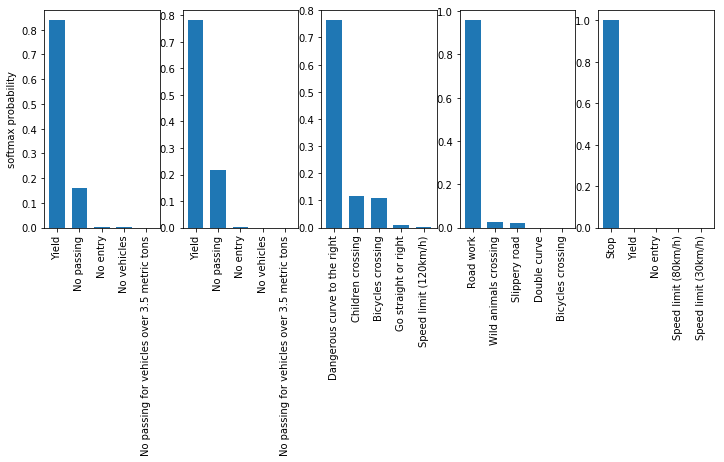

In [21]:
plt.figure(1,plt.figure(figsize=(12,4)))
for img in range(5):
    plt.subplot(1, 5, img+1)
    if img+1 == 1:
        plt.ylabel('softmax probability')
    plt.bar(range(1,6),soft_max_prob[0][img],width=0.7, align="center")
    ticks = list(map(lambda x:sign_names[x],soft_max_prob[1][img]))
    plt.xticks(range(1,6),ticks, rotation='vertical')
plt.show()

### Question 10
_Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability._

**Answer:** The model is more than 99% certain on the first two images (which were closest to the images in the dataset). When classifying incorrectly, its confidence drops, and in the case of speed limits, the correct class also has a non-negligible probability of around 10%.
The bar graph for softmax probailities along with the sign type is plotted above

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 